In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ROBOD

In [30]:
results = pd.read_csv('../results/results_ROBOD.csv')

In [31]:
results.head()

,Dataset,Model,|BatchSize,Lr,N_past,Hidden_size,Seed,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,TestF1,ValF1,TestLoss.1,Train_days,Num_frozen,Type
0,ROBOD,RF,NaN,NaN,NaN,NaN,NaN,NaN,0.834245,11.357283,NaN,NaN,0.667559,NaN,NaN,1,2,RF
1,ROBOD,RF,NaN,NaN,NaN,NaN,NaN,NaN,0.814026,11.405806,NaN,NaN,0.585206,NaN,NaN,1,2,RF
2,ROBOD,RF,NaN,NaN,NaN,NaN,NaN,NaN,0.793674,13.175525,NaN,NaN,0.638701,NaN,NaN,1,2,RF
3,ROBOD,RF,NaN,NaN,NaN,NaN,NaN,NaN,0.795676,12.212910,NaN,NaN,0.606123,NaN,NaN,1,2,RF
4,ROBOD,RF,NaN,NaN,NaN,NaN,NaN,NaN,0.831776,10.235900,NaN,NaN,0.638463,NaN,NaN,1,2,RF


In [32]:
grouped = results.groupby(['Train_days', 'Num_frozen', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]
grouped.reset_index(inplace=True)
grouped.columns = grouped.columns.map('_'.join)
grouped

C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_23572\2212941277.py:1: FutureWarning: ['Dataset', 'Model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = results.groupby(['Train_days', 'Num_frozen', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]


,Train_days_,Num_frozen_,Type_,TestF1_mean,TestF1_std,TestF1_count_nonzero,TestAcc_mean,TestAcc_std,TestAcc_count_nonzero
0,1,0,Transfer,0.480299,0.012776,9,0.782672,0.021505,9
1,1,1,Transfer,0.436880,0.000557,9,0.824814,0.001197,9
2,1,2,Naive,0.414652,NaN,1,0.724051,NaN,1
3,1,2,No transfer,0.416822,0.029754,9,0.591780,0.134080,9
4,1,2,RF,0.621532,0.025036,9,0.802171,0.030348,9
5,1,2,Transfer,0.428949,0.002398,9,0.834142,0.001149,9
6,2,0,Transfer,0.482859,0.040930,9,0.775745,0.025802,9
7,2,1,Transfer,0.448288,0.002674,9,0.832595,0.001874,9
8,2,2,Naive,0.420248,NaN,1,0.729441,NaN,1
9,2,2,No transfer,0.455198,0.003978,9,0.670569,0.019396,9


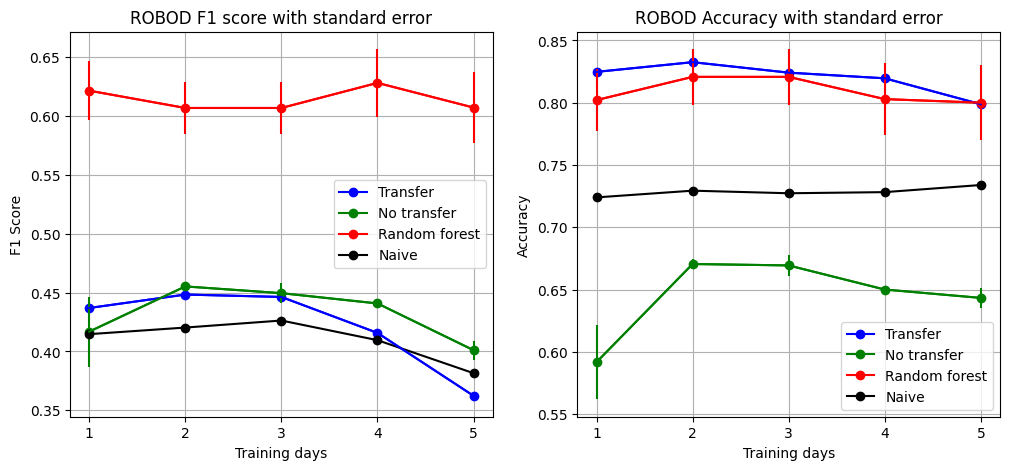

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sub_df = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==1)]
sub_df_nt = grouped.loc[(grouped['Type_']=='No transfer')]
sub_df_rf = grouped.loc[(grouped['Type_']=='RF')]
sub_df_naive = grouped.loc[(grouped['Type_']=='Naive')]
ax1.plot(sub_df['Train_days_'], sub_df['TestF1_mean'], 'bo-', label='Transfer')
ax1.errorbar(sub_df['Train_days_'], sub_df['TestF1_mean'], sub_df['TestF1_std'], fmt='b')
ax1.plot(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], 'go-', label='No transfer')
ax1.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax1.plot(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], 'ro-', label='Random forest')
ax1.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax1.plot(sub_df_naive['Train_days_'], sub_df_naive['TestF1_mean'], 'ko-', label='Naive')
ax2.plot(sub_df['Train_days_'], sub_df['TestAcc_mean'], 'bo-', label='Transfer')
ax2.errorbar(sub_df['Train_days_'], sub_df['TestAcc_mean'], sub_df['TestF1_std'], fmt='b')
ax2.plot(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], 'go-', label='No transfer')
ax2.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax2.plot(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], 'ro-', label='Random forest')
ax2.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax2.plot(sub_df_naive['Train_days_'], sub_df_naive['TestAcc_mean'], 'ko-', label='Naive')
ax1.set_xticks(ticks=range(1,6), labels=range(1,6))
ax1.set_xlabel('Training days')
ax1.set_ylabel('F1 Score')
ax1.set_title('ROBOD F1 score with standard error')
ax1.legend()
ax2.set_xticks(ticks=range(1,6), labels=range(1,6))
ax2.set_xlabel('Training days')
ax2.set_ylabel('Accuracy')
ax2.set_title('ROBOD Accuracy with standard error')
ax2.legend()
ax1.grid(True)
ax2.grid(True)
plt.savefig('../fig/results_ROBOD.png', facecolor='white', bbox_inches='tight')

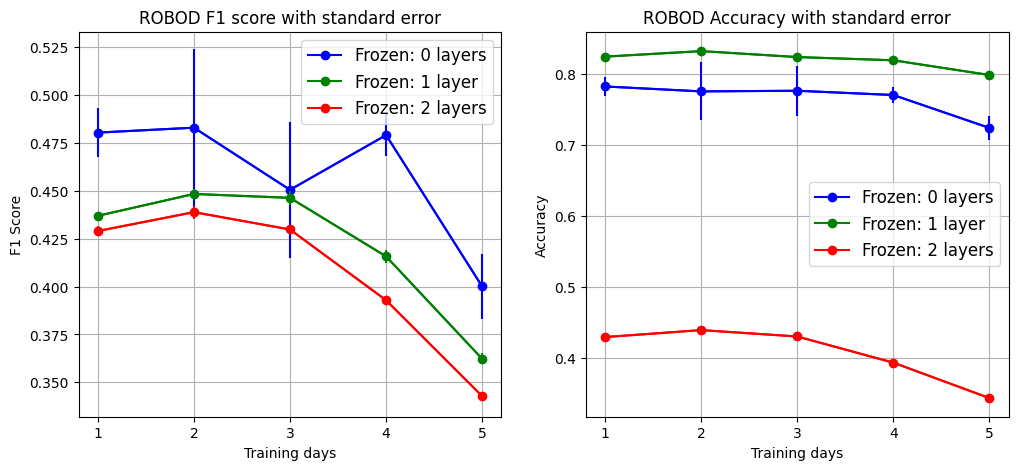

In [34]:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sub_df = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==0)]
sub_df_1 = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==1)]
sub_df_2 = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==2)]
ax1.plot(sub_df['Train_days_'], sub_df['TestF1_mean'], 'bo-', label='Frozen: 0 layers')
ax1.errorbar(sub_df['Train_days_'], sub_df['TestF1_mean'], sub_df['TestF1_std'], fmt='b')
ax1.plot(sub_df_1['Train_days_'], sub_df_1['TestF1_mean'], 'go-', label='Frozen: 1 layer')
ax1.errorbar(sub_df_1['Train_days_'], sub_df_1['TestF1_mean'], sub_df_1['TestF1_std'], fmt='g')
ax1.plot(sub_df_2['Train_days_'], sub_df_2['TestF1_mean'], 'ro-', label='Frozen: 2 layers')
ax1.errorbar(sub_df_2['Train_days_'], sub_df_2['TestF1_mean'], sub_df_2['TestF1_std'], fmt='r')
ax2.plot(sub_df['Train_days_'], sub_df['TestAcc_mean'], 'bo-', label='Frozen: 0 layers')
ax2.errorbar(sub_df['Train_days_'], sub_df['TestAcc_mean'], sub_df['TestF1_std'], fmt='b')
ax2.plot(sub_df_1['Train_days_'], sub_df_1['TestAcc_mean'], 'go-', label='Frozen: 1 layer')
ax2.errorbar(sub_df_1['Train_days_'], sub_df_1['TestAcc_mean'], sub_df_1['TestF1_std'], fmt='g')
ax2.plot(sub_df_2['Train_days_'], sub_df_2['TestF1_mean'], 'ro-', label='Frozen: 2 layers')
ax2.errorbar(sub_df_2['Train_days_'], sub_df_2['TestF1_mean'], sub_df_2['TestF1_std'], fmt='r')
ax1.set_xticks(ticks=range(1,6), labels=range(1,6))
ax1.set_xlabel('Training days')
ax1.set_ylabel('F1 Score')
ax1.set_title('ROBOD F1 score with standard error')
ax1.legend(fontsize=12)
ax2.set_xticks(ticks=range(1,6), labels=range(1,6))
ax2.set_xlabel('Training days')
ax2.set_ylabel('Accuracy')
ax2.set_title('ROBOD Accuracy with standard error')
ax2.legend(fontsize=12)
ax1.grid(True)
ax2.grid(True)
plt.savefig('../fig/layerfreezing.png', bbox_inches='tight', facecolor='white')

# ECO

In [35]:
results_eco = pd.read_csv('../results/results_ECO.csv')
results_eco.head()

,Dataset,Model,BatchSize,StartingLr,N_days,HiddenSize,Seed,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,TestF1,ValF1,TrainLoss,Train_days,Num_frozen,Type
0,ECO,LSTM,512.0,0.05,10.0,32.0,4444.0,6.0,0.841873,0.3752,0.879782,0.2770,0.723749,0.738768,0.187100,3,0,Transfer
1,ECO,LSTM,512.0,0.05,10.0,32.0,4444.0,10.0,0.797175,0.4697,0.871433,0.3065,0.674337,0.670229,0.234845,9,0,Transfer
2,ECO,LSTM,512.0,0.05,10.0,32.0,4444.0,9.0,0.831959,0.4116,0.902276,0.2087,0.719506,0.871736,0.279791,6,0,Transfer
3,ECO,LSTM,512.0,0.05,10.0,32.0,5555.0,9.0,0.830938,0.4133,0.872452,0.3191,0.706958,0.647925,0.226234,9,0,Transfer
4,ECO,LSTM,512.0,0.05,10.0,32.0,5555.0,2.0,0.807783,0.4211,0.847858,0.3053,0.734863,0.776385,0.417852,3,0,Transfer


In [36]:
grouped = results_eco.groupby(['Train_days', 'Num_frozen', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]
grouped.reset_index(inplace=True)
grouped.columns = grouped.columns.map('_'.join)
grouped

C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_23572\3144115810.py:1: FutureWarning: ['Dataset', 'Model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = results_eco.groupby(['Train_days', 'Num_frozen', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]


,Train_days_,Num_frozen_,Type_,TestF1_mean,TestF1_std,TestF1_count_nonzero,TestAcc_mean,TestAcc_std,TestAcc_count_nonzero
0,3,0,Transfer,0.720664,0.011144,6,0.824633,0.012859,6
1,3,2,Naive,0.277363,NaN,1,0.316381,NaN,1
2,3,2,No Transfer,0.709436,0.021255,6,0.864855,0.013339,6
3,3,2,RF,0.663907,0.079687,9,0.554650,0.065777,9
4,6,0,Transfer,0.713819,0.006920,6,0.823858,0.008694,6
5,6,2,Naive,0.278618,NaN,1,0.317109,NaN,1
6,6,2,No Transfer,0.690332,0.028245,9,0.746460,0.042223,9
7,6,2,RF,0.762664,0.027794,9,0.640197,0.033904,9
8,9,0,Transfer,0.691529,0.018811,6,0.818162,0.017097,6
9,9,2,Naive,0.280179,NaN,1,0.317119,NaN,1


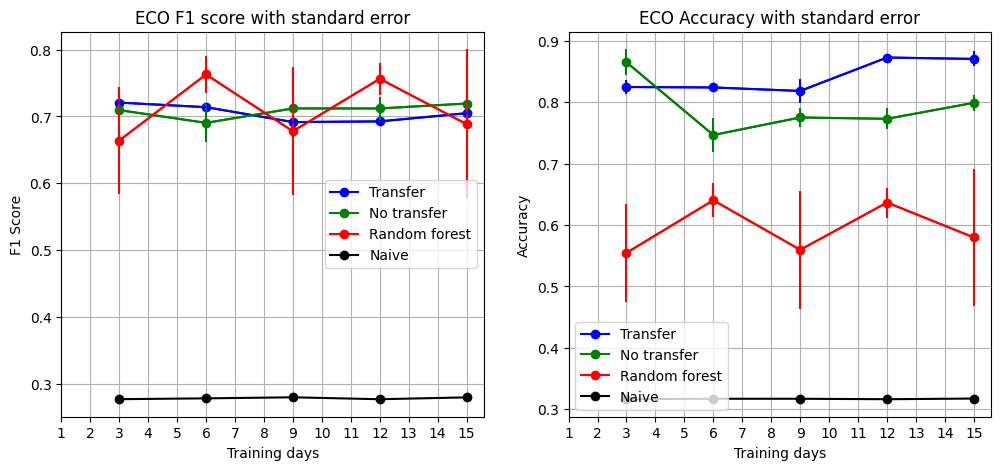

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sub_df = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_']==0)]
sub_df_nt = grouped.loc[(grouped['Type_']=='No Transfer')]
sub_df_rf = grouped.loc[(grouped['Type_']=='RF')]
sub_df_naive = grouped.loc[(grouped['Type_']=='Naive')]
ax1.plot(sub_df['Train_days_'], sub_df['TestF1_mean'], 'bo-', label='Transfer')
ax1.errorbar(sub_df['Train_days_'], sub_df['TestF1_mean'], sub_df['TestF1_std'], fmt='b')
ax1.plot(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], 'go-', label='No transfer')
ax1.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax1.plot(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], 'ro-', label='Random forest')
ax1.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax1.plot(sub_df_naive['Train_days_'], sub_df_naive['TestF1_mean'], 'ko-', label='Naive')
ax2.plot(sub_df['Train_days_'], sub_df['TestAcc_mean'], 'bo-', label='Transfer')
ax2.errorbar(sub_df['Train_days_'], sub_df['TestAcc_mean'], sub_df['TestF1_std'], fmt='b')
ax2.plot(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], 'go-', label='No transfer')
ax2.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax2.plot(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], 'ro-', label='Random forest')
ax2.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax2.plot(sub_df_naive['Train_days_'], sub_df_naive['TestAcc_mean'], 'ko-', label='Naive')
ax1.set_xticks(ticks=range(1,16), labels=range(1,16))
ax1.set_xlabel('Training days')
ax1.set_ylabel('F1 Score')
ax1.set_title('ECO F1 score with standard error')
ax1.legend()
ax2.set_xticks(ticks=range(1,16), labels=range(1,16))
ax2.set_xlabel('Training days')
ax2.set_ylabel('Accuracy')
ax2.set_title('ECO Accuracy with standard error')
ax2.legend()
ax1.grid(True)
ax2.grid(True)
plt.savefig('../fig/results_ECO.png', facecolor='white', bbox_inches='tight')

# HPDMobile

In [38]:
results_hpdmobile = pd.read_csv('../results/results_HPDMobile.csv')
results_hpdmobile.head()

,Dataset,Model,BatchSize,StartingLr,N_days,HiddenSize,Seed,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,TestF1,ValF1,TrainLoss,Train_days,Num_frozen_layers,Type
0,HPDMobile,LSTM,512.0,0.025,15.0,32.0,1111.0,13.0,0.859480,0.3823,0.962891,0.1287,0.530534,0.522248,0.220693,2,2,No Transfer
1,HPDMobile,LSTM,512.0,0.025,15.0,32.0,1111.0,15.0,0.852005,0.4796,0.978264,0.1029,0.518841,0.536182,0.186425,4,2,No Transfer
2,HPDMobile,LSTM,512.0,0.025,15.0,32.0,1111.0,5.0,0.851572,0.3836,0.891003,0.2661,0.515068,0.467128,0.188766,6,2,No Transfer
3,HPDMobile,LSTM,512.0,0.025,15.0,32.0,22.0,11.0,0.859343,0.4147,0.962324,0.1273,0.530352,0.521899,0.231271,2,2,No Transfer
4,HPDMobile,LSTM,512.0,0.025,15.0,32.0,22.0,10.0,0.851788,0.4173,0.977949,0.1053,0.518776,0.536005,0.212866,4,2,No Transfer


In [39]:
grouped = results_hpdmobile.groupby(['Train_days', 'Num_frozen_layers', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]
grouped.reset_index(inplace=True)
grouped.columns = grouped.columns.map('_'.join)
grouped

C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_23572\2755100157.py:1: FutureWarning: ['Dataset', 'Model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = results_hpdmobile.groupby(['Train_days', 'Num_frozen_layers', 'Type']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestF1', 'TestAcc']]


,Train_days_,Num_frozen_layers_,Type_,TestF1_mean,TestF1_std,TestF1_count_nonzero,TestAcc_mean,TestAcc_std,TestAcc_count_nonzero
0,2,0,Transfer,0.529342,0.000700,9,0.858765,0.000608,9
1,2,2,Naive,0.423637,NaN,1,0.434288,NaN,1
2,2,2,No Transfer,0.530538,0.000254,11,0.859501,0.000350,11
3,2,2,RF,0.429051,0.151898,9,0.437603,0.223758,9
4,4,0,Transfer,0.518527,0.000468,8,0.851592,0.000317,8
5,4,2,Naive,0.416954,NaN,1,0.436398,NaN,1
6,4,2,No Transfer,0.518700,0.000297,9,0.851880,0.000288,9
7,4,2,RF,0.549641,0.203963,9,0.608162,0.212476,9
8,6,0,Transfer,0.512149,0.006818,9,0.848063,0.007353,9
9,6,2,Naive,0.410888,NaN,1,0.426664,NaN,1


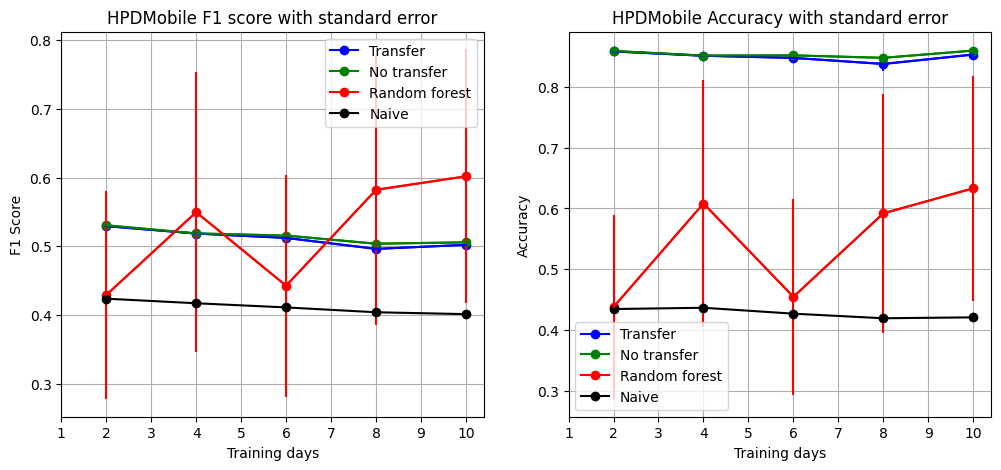

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sub_df = grouped.loc[(grouped['Type_']=='Transfer') & (grouped['Num_frozen_layers_']==0)]
sub_df_nt = grouped.loc[(grouped['Type_']=='No Transfer')]
sub_df_rf = grouped.loc[(grouped['Type_']=='RF')]
sub_df_naive = grouped.loc[(grouped['Type_']=='Naive')]
ax1.plot(sub_df['Train_days_'], sub_df['TestF1_mean'], 'bo-', label='Transfer')
ax1.errorbar(sub_df['Train_days_'], sub_df['TestF1_mean'], sub_df['TestF1_std'], fmt='b')
ax1.plot(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], 'go-', label='No transfer')
ax1.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestF1_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax1.plot(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], 'ro-', label='Random forest')
ax1.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestF1_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax1.plot(sub_df_naive['Train_days_'], sub_df_naive['TestF1_mean'], 'ko-', label='Naive')
ax2.plot(sub_df['Train_days_'], sub_df['TestAcc_mean'], 'bo-', label='Transfer')
ax2.errorbar(sub_df['Train_days_'], sub_df['TestAcc_mean'], sub_df['TestF1_std'], fmt='b')
ax2.plot(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], 'go-', label='No transfer')
ax2.errorbar(sub_df_nt['Train_days_'], sub_df_nt['TestAcc_mean'], sub_df_nt['TestF1_std'], fmt='g')
ax2.plot(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], 'ro-', label='Random forest')
ax2.errorbar(sub_df_rf['Train_days_'], sub_df_rf['TestAcc_mean'], sub_df_rf['TestF1_std'], fmt='r')
ax2.plot(sub_df_naive['Train_days_'], sub_df_naive['TestAcc_mean'], 'ko-', label='Naive')
ax1.set_xticks(ticks=range(1,11), labels=range(1,11))
ax1.set_xlabel('Training days')
ax1.set_ylabel('F1 Score')
ax1.set_title('HPDMobile F1 score with standard error')
ax1.legend()
ax2.set_xticks(ticks=range(1,11), labels=range(1,11))
ax2.set_xlabel('Training days')
ax2.set_ylabel('Accuracy')
ax2.set_title('HPDMobile Accuracy with standard error')
ax2.legend()
ax1.grid(True)
ax2.grid(True)
plt.savefig('../fig/results_HPDMobile.png', facecolor='white', bbox_inches='tight')